In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df= pd.read_csv(r"C:\Users\yasho\Downloads\Online_Payments_Fraud_Detection\Dataset\spilt_chunks\Final_Enhanced_Transaction_Log_chunk_2_populated.csv")

In [4]:
df.shape

(100000, 44)

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,UpdatedFlaggedFraud,merchant_category,account_age_days,failed_login_attempts,fraud_label,lat,lon
count,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.632140,251.956906,8.866162e+05,9.063106e+05,1.001821e+06,1.199698e+06,0.000310,0.249080,5737.765080,511.341060,1.996790,0.500530,0.017581,0.170133
std,0.874452,142.948769,2.856169e+06,2.893198e+06,2.341878e+06,2.499521e+06,0.017604,0.432482,213.357942,280.123751,1.414079,0.500002,52.012004,104.053041
min,10.000000,5.010000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,5411.000000,30.000000,0.000000,0.000000,-89.993038,-179.992033
25%,11.000000,127.237500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,5411.000000,269.000000,1.000000,0.000000,-45.100592,-89.968876
50%,12.000000,252.195000,1.786658e+04,0.000000e+00,1.084785e+05,2.357202e+05,0.000000,0.000000,5732.000000,510.000000,2.000000,1.000000,-0.044427,0.280424
75%,12.000000,375.380000,1.931311e+05,2.396053e+05,9.325800e+05,1.301383e+06,0.000000,0.000000,5999.000000,752.250000,3.000000,1.000000,45.056343,90.590824
max,13.000000,499.990000,3.890000e+07,3.890000e+07,3.900000e+07,3.900000e+07,1.000000,1.000000,5999.000000,999.000000,4.000000,1.000000,89.994704,179.999486


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   step                   100000 non-null  int64  
 1   type                   100000 non-null  object 
 2   amount                 100000 non-null  float64
 3   nameOrig               100000 non-null  object 
 4   oldbalanceOrg          100000 non-null  float64
 5   newbalanceOrig         100000 non-null  float64
 6   nameDest               100000 non-null  object 
 7   oldbalanceDest         100000 non-null  float64
 8   newbalanceDest         100000 non-null  float64
 9   isFraud                100000 non-null  int64  
 10  UpdatedFlaggedFraud    100000 non-null  int64  
 11  channel_type           100000 non-null  object 
 12  device_type            100000 non-null  object 
 13  transaction_id         100000 non-null  object 
 14  user_id                100000 non-nul

In [7]:
df.isnull().sum()

step                     0
type                     0
amount                   0
nameOrig                 0
oldbalanceOrg            0
newbalanceOrig           0
nameDest                 0
oldbalanceDest           0
newbalanceDest           0
isFraud                  0
UpdatedFlaggedFraud      0
channel_type             0
device_type              0
transaction_id           0
user_id                  0
timestamp                0
currency                 0
transaction_type         0
status                   0
merchant_id              0
merchant_category        0
merchant_country         0
merchant_city            0
payment_method           0
account_age_days         0
user_device_id           0
user_ip_address          0
user_location            0
login_method             0
channel                  0
os                       0
browser                  0
app_version              0
ip_geolocation           0
failed_login_attempts    0
password_reset_flag      0
is_blacklisted_user      0
f

In [8]:
df.duplicated().sum()

0

#  Selection of Target Variable

In [10]:
# Check Value Counts
print("isFraud distribution:\n", df['isFraud'].value_counts())
print("\nfraud_label distribution:\n", df['fraud_label'].value_counts())


isFraud distribution:
 isFraud
0    99969
1       31
Name: count, dtype: int64

fraud_label distribution:
 fraud_label
1    50053
0    49947
Name: count, dtype: int64


In [11]:
correlation = df['isFraud'].corr(df['fraud_label'])
print(f"Correlation: {correlation}")


Correlation: 0.001685484493973051


In [12]:
mismatches = (df['isFraud'] != df['fraud_label']).sum()
print(f"Number of mismatched rows: {mismatches}")


Number of mismatched rows: 50050


In [13]:
df[df['isFraud'] != df['fraud_label']][['isFraud', 'fraud_label']].head()


,isFraud,fraud_label
4,0,1
5,0,1
6,0,1
9,0,1
13,0,1


In [14]:
# Impute mismatches in 'isFraud' using 'fraud_label'
df.loc[df['isFraud'] != df['fraud_label'], 'isFraud'] = df['fraud_label']


In [15]:
# Confirm that now both columns match
mismatches_after = (df['isFraud'] != df['fraud_label']).sum()
print(f"Remaining mismatched rows: {mismatches_after}")  # Should be 0


Remaining mismatched rows: 0


In [16]:
df['fraud_label'].value_counts(normalize=True) * 100


fraud_label
1    50.053
0    49.947
Name: proportion, dtype: float64

<Axes: xlabel='fraud_label', ylabel='amount'>

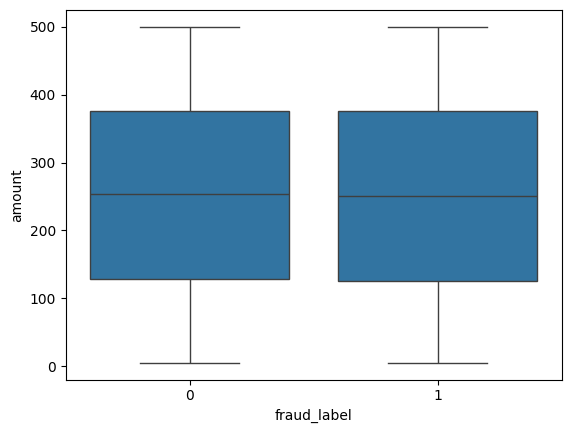

In [17]:
sns.boxplot(x='fraud_label', y='amount', data=df)

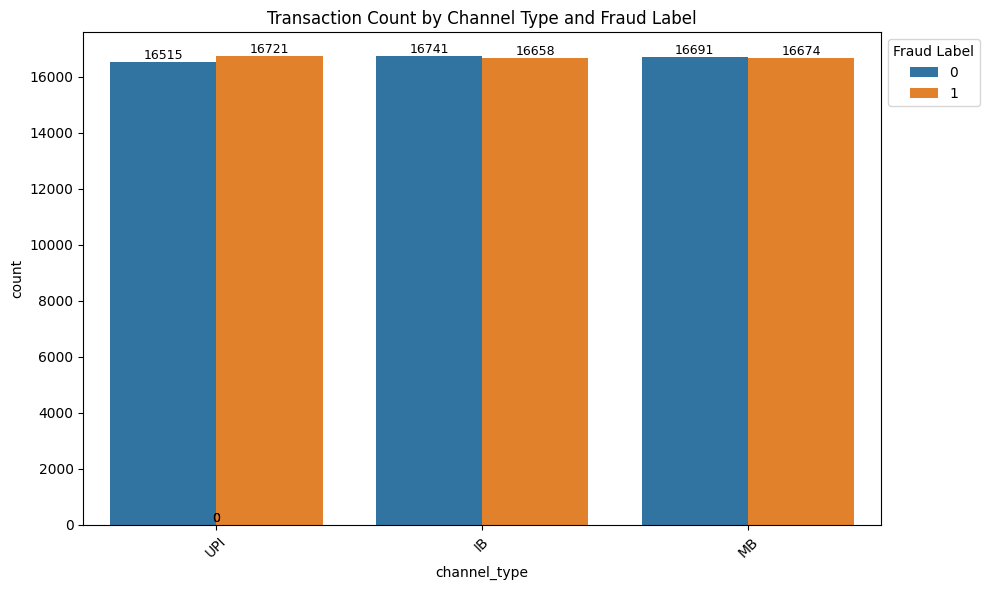

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='channel_type', hue='fraud_label', data=df)

# Annotate bars manually (for older matplotlib versions)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=9)

# Move legend outside the plot
ax.legend(title='Fraud Label', loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.title("Transaction Count by Channel Type and Fraud Label")
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()

In [19]:
df.groupby('user_id')['fraud_label'].mean().sort_values(ascending=False).head()
df.groupby('user_ip_address')['fraud_label'].mean().sort_values(ascending=False).head()


user_ip_address
212.229.115.152    1.0
179.129.125.40     1.0
179.120.28.58      1.0
59.228.193.118     1.0
179.122.45.178     1.0
Name: fraud_label, dtype: float64

In [20]:
df.drop(columns=[
    'transaction_id', 'session_id', 'previous_txn_id', 'user_ip_address',
    'user_device_id', 'user_id', 'nameOrig', 'nameDest'
], inplace=True)


In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df.drop(columns='timestamp', inplace=True)


In [22]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    'type', 'channel_type', 'device_type', 'currency', 'transaction_type',
    'status', 'merchant_country', 'merchant_city', 'payment_method',
    'login_method', 'channel', 'os', 'browser', 'app_version',
    'ip_geolocation', 'referral_code', 'device_language', 'user_location'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [23]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [
    'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
    'newbalanceDest', 'merchant_category', 'account_age_days',
    'failed_login_attempts', 'lat', 'lon', 'hour', 'dayofweek', 'month'
]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [24]:
from scipy.stats import zscore

z_scores = df[numeric_cols].apply(zscore)
df = df[(abs(z_scores) < 3).all(axis=1)]


In [25]:
# 1. Separate features and target
X = df.drop(columns=['isFraud'])  # or your target column
y = df['isFraud']


In [26]:
cat_cols = X.select_dtypes(include='object').columns
print(cat_cols)


Index(['merchant_id'], dtype='object')


In [27]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])


In [28]:
X = pd.get_dummies(X, columns=cat_cols)


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(25).index
X = X[top_features]


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [33]:
from xgboost import XGBClassifier

model = XGBClassifier(
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train_pca, y_train)  # or use X_train if you skipped PCA


C:\Users\yasho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:42:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test_pca)
y_proba = model.predict_proba(X_test_pca)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


[[9499    4]
 [   5 9516]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9503
           1       1.00      1.00      1.00      9521

    accuracy                           1.00     19024
   macro avg       1.00      1.00      1.00     19024
weighted avg       1.00      1.00      1.00     19024

ROC AUC Score: 0.9999986516068542


In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Sample data (optional: for quicker tuning)
X_sample = X_train.sample(frac=0.2, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'gamma': [0, 1, 2]
}

# Calculate scale_pos_weight safely
neg, pos = (y_sample == 0).sum(), (y_sample == 1).sum()
scale_pos_weight = neg / pos if pos != 0 else 1.0

# Base model
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Run grid search
grid_search.fit(X_sample, y_sample)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Use the best estimator on full training data
best_model = grid_search.best_estimator_
best_model.fit(X_train_pca, y_train)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\yasho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:45:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}


C:\Users\yasho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:45:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [36]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_pca, y_train)


C:\Users\yasho\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:45:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = best_model.predict(X_test_pca)
y_proba = best_model.predict_proba(X_test_pca)[:, 1]  # for AUC

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9503
           1       0.95      0.96      0.95      9521

    accuracy                           0.95     19024
   macro avg       0.95      0.95      0.95     19024
weighted avg       0.95      0.95      0.95     19024

Confusion Matrix:
[[9050  453]
 [ 425 9096]]
ROC AUC Score: 0.9920771181849903


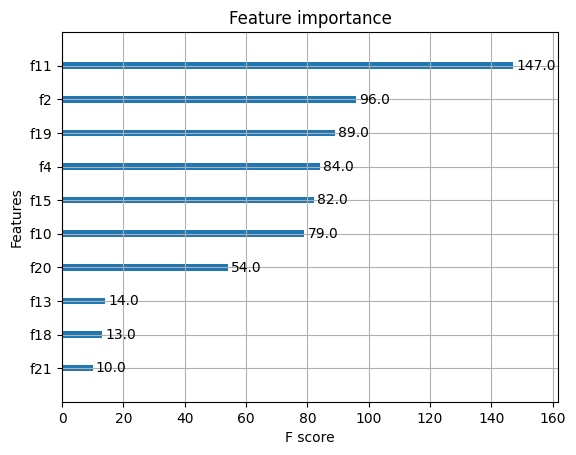

In [38]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(best_model, max_num_features=10)
plt.show()

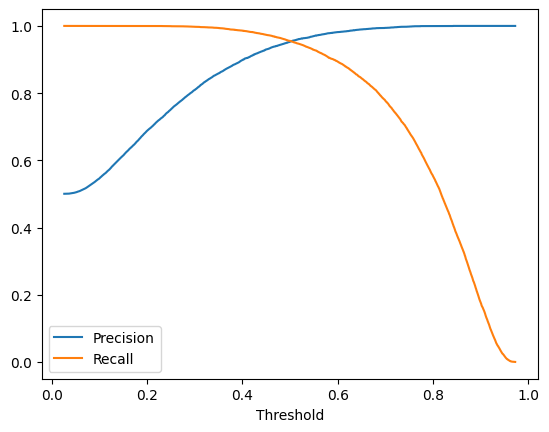

In [43]:
from sklearn.metrics import precision_recall_curve

y_scores = best_model.predict_proba(X_test_pca)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot PR Curve
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [45]:
import joblib

joblib.dump(best_model, "xgb_best_model.pkl")


['xgb_best_model.pkl']